## Chemical Reactions

model answer

In [1]:
import numpy as np
import scipy.integrate
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def dydt(t,y,k1,k2):

    A, B = y
    dAdt = # equation?
    dBdt = # equation?
    return (dAdt, dBdt)

SyntaxError: invalid syntax (<ipython-input-2-ec732bd11740>, line 4)

In [12]:
def euler(dydt,time_interval,y0,k1,k2):

    Y = [y0]
    dt = 0.001 # integration step
    t_start = time_interval[0]
    t_max = time_interval[1]
    T = [t_start]
    while t_start <= t_max:
        Y.append( Y[-1] + np.multiply(dt,dydt(t_start, Y[-1],k1,k2)))
        t_start = t_start + dt
        T.append(t_start)

    return (T,Y)

Set initial parameters

In [13]:
k1 = 0.1
k2 = 0.3
A0, B0 = 1, 0

We use a <code>lambda</code>, which creates a function. Here we use this function to pass in the parameters <code>k1</code> and <code>k2</code>, and generate a function <code>dydt_withks</code> that incorporates them.

In [14]:
dydt_withks = lambda t,y: dydt(t,y,k1,k2)

We then numerically integrate the ODEs with <code>scipy.integrate.solve_ivp</code> (where <code>solve_ivp</code> stands for solve initial value problem) and method RK45, equivalent to ODE45 in Matlab. We also measure how long the solution takes with a timer called <code>time_for_num_int_by_ode45</code>.

In [15]:
start = timer()
solution = scipy.integrate.solve_ivp(dydt_withks, t_span=(0,10), y0=(A0,B0), method='RK45', rtol=1e-6)
end = timer()
time_for_num_int_by_ode45 = end-start
print("time for ODE45, ",   time_for_num_int_by_ode45)

t_ode45 = solution.t
A_ode45 = solution.y[0]
B_ode45 = solution.y[1]
print("Equilibrium points of A, B")
print(A_ode45[-1],B_ode45[-1])

time for ODE45,  0.0057090469999820925
Equilibrium points of A, B
0.6870466535300075 0.15647667323499637


Do the same with our homegrown Euler method.

In [16]:
start = timer()
solution = euler(dydt, (0,10), np.array([A0,B0]), k1, k2)
end = timer()
time_for_num_int_by_euler = end-start
print("time for Euler, ", time_for_num_int_by_euler)
t_euler = solution[0]
A_euler = [A for (A,B) in solution[1]] # answer needs re-arranging.
B_euler = [B for (A,B) in solution[1]]

time for Euler,  0.06574702300002855


Plot the results.

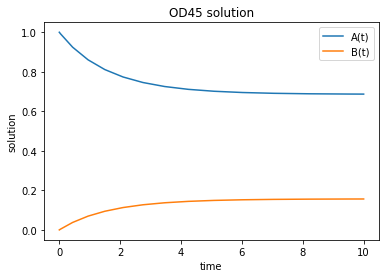

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_ode45, (A_ode45), color='tab:blue', label='A(t)', rtol=1e-6)
# Plot for B_ode45
ax.set_title('OD45 solution')
ax.set_xlabel('time')
ax.set_ylabel('solution')
ax.legend() 
plt.show()

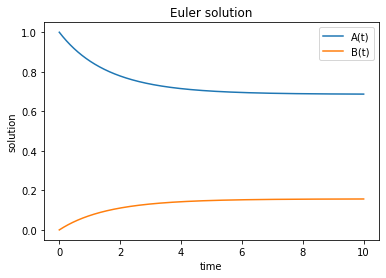

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_euler, (A_euler), color='tab:blue',label='A(t)')
# plot for B_euler
ax.set_title('Euler solution')
ax.set_xlabel('time')
ax.set_ylabel('solution')
ax.legend() 
plt.show()

And we're done.